<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/tf-low-level-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Low Level Classification with TensorFlow 2

## Objectives

- activation functions
- classification

In [0]:
import matplotlib.pyplot as plt
# plt.xkcd()
# plt.style.use('ggplot')
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)

In [2]:
# Gives us a well defined version of tensorflow

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# will also work, but nightly build might contain surprises

# !pip install -q tf-nightly-gpu-2.0-preview

TensorFlow 2.x selected.


In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0-rc1


In [4]:
# a small sanity check, does tf seem to work ok?
hello = tf.constant('Hello TF!')
print("This works: {}".format(hello))

This works: b'Hello TF!'


In [0]:
# this should return True even on Colab
assert tf.test.is_gpu_available()

In [0]:
# we have the gpu version of TensorFlow running
assert tf.test.is_built_with_cuda()

In [7]:
# What kind of GPU are we running on
!nvidia-smi

Sat Sep 21 15:42:23 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    59W / 149W |     69MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
# different from TF 1, everything gets executed immediately 
assert tf.executing_eagerly()

## A new challange: predicting a category instead of a continous value

* so far we were inferring a continous value for another
* now we want to infer which category a point in 2d belongs to
* this is called a classification
* since we only have two categories (0/1 or red/blue) this is called a binart classification

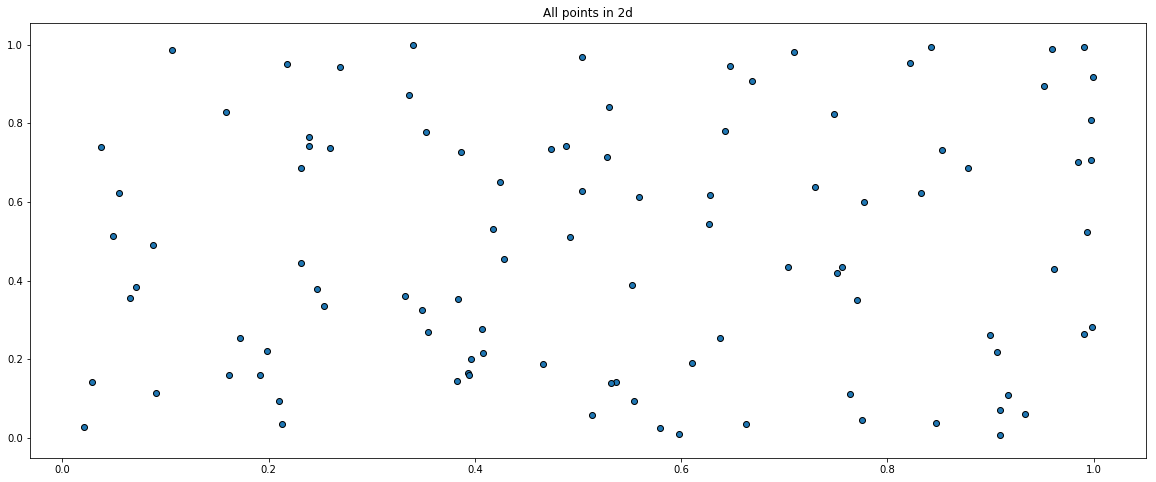

In [9]:
import numpy as np

a = -1
b = 1
n = 100

# all points
X = np.random.uniform(0, 1, (n, 2))
plt.title('All points in 2d')

plt.scatter(X[:,0], X[:,1], marker='o', edgecolors='k');

In [10]:
# below or above line determines which category they belong to (plus noise)
noise_level = 0.3
noise = noise_level * np.random.normal(0, 1, n)
y = X[:, 1] > a*X[:, 0]+b + noise
y = y.astype(int)
y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1])

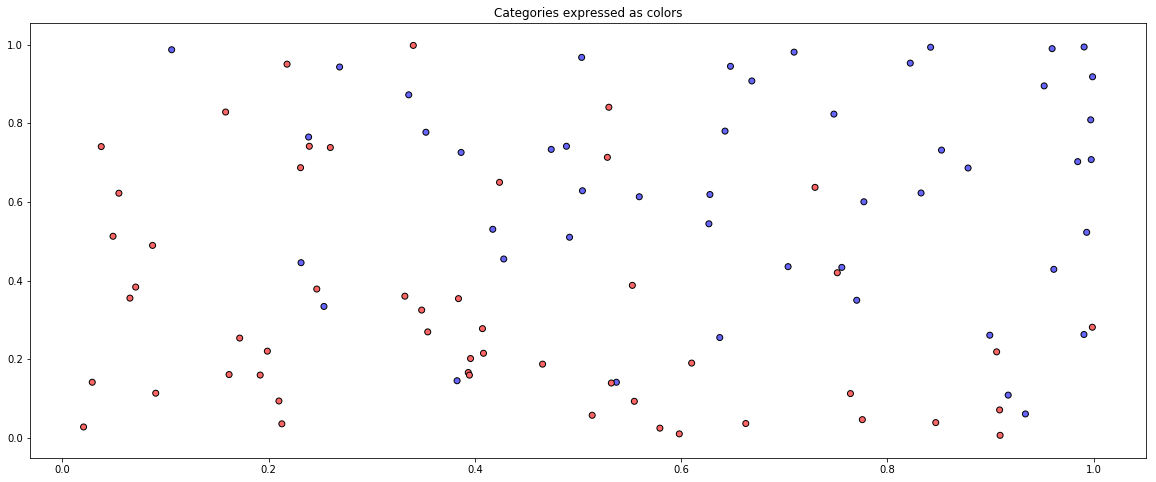

In [11]:
from matplotlib.colors import ListedColormap

plt.title('Categories expressed as colors')
plt.scatter(X[:,0], X[:,1], c=y, cmap=ListedColormap(['#FF6666', '#6666FF']), marker='o', edgecolors='k');

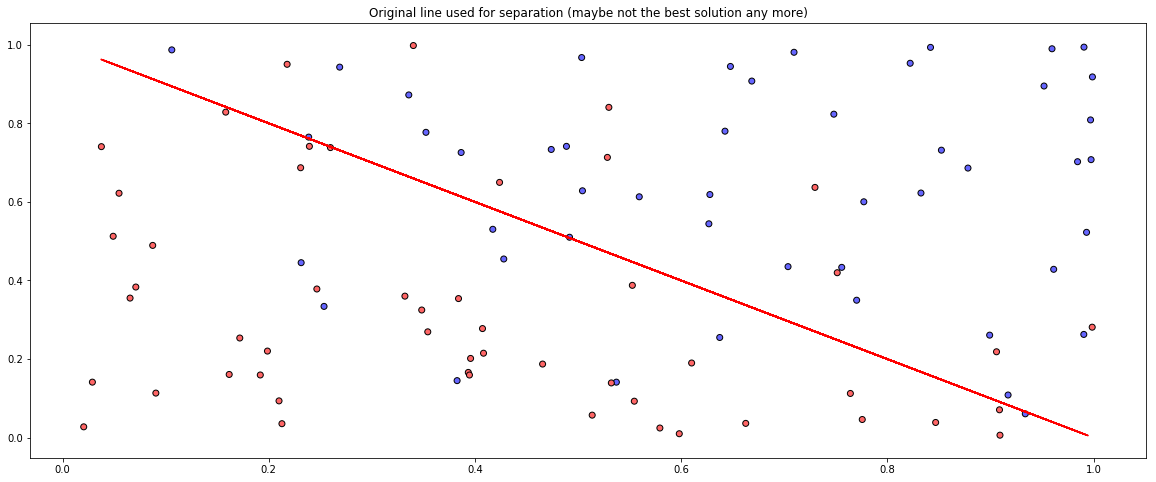

In [12]:
# the exact same line as used for separation, but without noise
line_x = np.random.uniform(0, 1, n)
line_y = a*line_x+b
plt.plot(line_x, line_y, 'r')

plt.title('Original line used for separation (maybe not the best solution any more)')
plt.scatter(X[:,0], X[:,1], c=y, cmap=ListedColormap(['#FF6666', '#6666FF']), marker='o', edgecolors='k');

## Understandinging the effect of activation functions


Typically, the output of a neuron is transformed using an activation function which compresses the output to a value between 0 and 1 (sigmoid), or between -1 and 1 (tanh) or sets all negative values to zero (relu).

<img src='https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/img/neuron.jpg'>

### Typical Activation Functions

<img src='https://djcordhose.github.io/ai/img/activation-functions.jpg'>


In [0]:
x = tf.reshape(tf.constant(tf.range(-1, 4, 0.1)), (50, 1))
y_pred = linear_layer(x)

plt.figure(figsize=(20, 10))

plt.plot(x, y_pred, linewidth=4)

y_pred_relu = tf.nn.relu(y_pred)
plt.plot(x, y_pred_relu)

y_pred_sigmoid = tf.nn.sigmoid(y_pred)
plt.plot(x, y_pred_sigmoid)

y_pred_tanh = tf.nn.tanh(y_pred)
plt.plot(x, y_pred_tanh)

plt.plot(input, output, 'ro')

plt.legend(['no activation', 'relu', 'sigmoid', 'tanh'])

NameError: ignored

## Logictic Regression

### We compress output between 0 and 1 using sigmoid to match y
* everything below 0.5 counts as 0, everthing above as 1

In [13]:
# sharing initialization from linear layer, but applying sigmoid when called 
class SigmoidLayer(LinearLayer):
  """y = sigmoid(w.x + b)"""

  def __init__(self, **kwargs):
      super(SigmoidLayer, self).__init__(**kwargs)

  def call(self, inputs):
      return tf.sigmoid(super().call(inputs))


NameError: ignored

### We have 2d input now

In [0]:
x = tf.constant(X, dtype='float32')
y_true = tf.constant(y, dtype='float32')
x.shape

In [0]:
model = SigmoidLayer(input_dim=2)

### Reconsidering the loss function

_cross entropy is an alternative to mean squared error_ 

* cross entropy can be used as an error measure when a network's outputs can be thought of as representing independent hypotheses
* activations can be understood as representing the probability that each hypothesis might be true
* the loss indicates the distance between what the network believes this distribution should be, and what the teacher says it should be 

https://en.wikipedia.org/wiki/Cross_entropy 

http://www.cse.unsw.edu.au/~billw/cs9444/crossentropy.html

In [0]:
loss_fn = tf.losses.binary_crossentropy

### Intuition for the learning process

_network stretches and folds the paper until it can find a line to separate red from blue_

<img src='https://github.com/djcordhose/ml-workshop/blob/master/notebooks/tf2/img/layers.gif?raw=1'>

<!-- <img src='img/layer-linear.jpg'> -->

https://twitter.com/random_forests/status/1084618439602298881
<br>
http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/
<br>
https://cs.stanford.edu/people/karpathy/convnetjs/
<br>
https://brohrer.github.io/what_nns_learn.html


In [0]:
# standard optimizer using advanced properties
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-1)

In [0]:
# basic metric for classification: share of correctly predicted samples
# https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/metrics/Accuracy
m = tf.keras.metrics.Accuracy()

In [0]:
EPOCHS = 1000

losses = []
accuracies = []

for step in range(EPOCHS):
  # Open a GradientTape.
  with tf.GradientTape() as tape:

    # Forward pass.
    y_pred = model(x)

    # Loss value for this batch.
    loss = loss_fn(y_true=tf.squeeze(y_true), y_pred=tf.squeeze(y_pred))

  y_pred_binary = (tf.squeeze(y_pred) > 0.5).numpy().astype(float)
  m.update_state(tf.squeeze(y_true), y_pred_binary)
  accuracy = m.result()

  losses.append(loss)
  accuracies.append(accuracy)
     
  # Get gradients of weights wrt the loss.
  gradients = tape.gradient(loss, model.trainable_weights)
  
  # Update the weights of our linear layer.
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))

In [0]:
print(loss)

In [0]:
print(accuracy)

In [0]:
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epochs")

plt.plot(losses)

In [0]:
plt.ylabel("accuracy")
plt.xlabel("epochs")

plt.plot(accuracies)

In [0]:
# tf.squeeze removes addional 1-dim dimensions
y_pred = tf.squeeze(model(x))
y_pred

## We are drawing a sigmoid in 3d and turn it into a step

<img src='https://github.com/DJCordhose/ml-workshop/blob/master/notebooks/tf2/img/logistic.jpg?raw=1'>

In [0]:
# everything below 0.5 counts as 0, everthing above as 1
# effectively turning this into a step
y_pred_binary = (y_pred > 0.5).numpy().astype(float)
y_pred_binary

In [0]:
misclassified = y_true - y_pred_binary
misclassified

In [0]:
# strong colors are misclassified

plt.xlabel("x1")
plt.ylabel("x2")

plt.scatter(X[:,0], X[:,1], c=misclassified, cmap=ListedColormap(['#FF0000', '#FFFFFF', '#0000FF']), marker='o')
plt.scatter(X[:,0], X[:,1], c=y_pred_binary, cmap=ListedColormap(['#FF6666', '#6666FF']), marker='o', edgecolors='k', alpha=0.5)


In [0]:
# for interactive 3d on local jupyer notebook

# %matplotlib notebook

In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

# we can have the probability encoded in shade of color
# ax.scatter(X[:, 0], X[:, 1], y_pred, c=y_pred_binary, 
ax.scatter(X[:, 0], X[:, 1], y_pred, c=y_pred, 
#            https://matplotlib.org/3.1.0/gallery/color/colormap_reference.html
           cmap=plt.cm.bwr,
           depthshade=False,
           marker='o', edgecolors='k')

# https://en.wikipedia.org/wiki/Azimuth
ax.view_init(elev=10, azim=-40)

In [0]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y_pred_binary, c=y_pred, 
           cmap=plt.cm.bwr,
           depthshade=False,
           marker='o', edgecolors='k')

ax.view_init(elev=10, azim=-40)

# Exercise: run this classification experiment with a bit more noise

* generated your own dataset using a bit more noise
* train the model and generate all the plots
* does all this make sense to you?

## The same solution using high level Keas API

In [0]:
from tensorflow.keras.layers import Dense
 
model = tf.keras.Sequential()

model.add(Dense(units=1, activation='sigmoid', input_dim=2))

model.summary()

In [0]:
%%time 

model.compile(loss=loss_fn, # binary cross entropy, unchanged from low level example
             optimizer=optimizer, # adam, unchanged from low level example
             metrics=['accuracy'])

# does a similar thing internally as our loop from above
history = model.fit(x, y_true, epochs=EPOCHS, verbose=0)

In [0]:
loss, accuracy = model.evaluate(x, y_true)
loss, accuracy

In [0]:
plt.ylabel("accuracy")
plt.xlabel("epochs")

plt.plot(history.history['accuracy'])

In [0]:
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epochs")

plt.plot(history.history['loss'])

In [0]:
y_pred = model.predict(x)
y_pred_binary = (tf.squeeze(y_pred) > 0.5).numpy().astype(float)
y_pred_binary

## From single neuron to network in the TensorFlow Playground

<img src='https://djcordhose.github.io/ai/img/tf-plaground.png'>

https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.98437&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false